# HR Analytics: Job Change Of Data Scientists
* 인공신경망 실습

# 데이터 설명(출처: Kaggle)

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change


In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [2]:
# 데이터 불러오기
train = pd.read_csv('/content/aug_train.csv')
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
test = pd.read_csv('/content/aug_test.csv')
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


## EDA

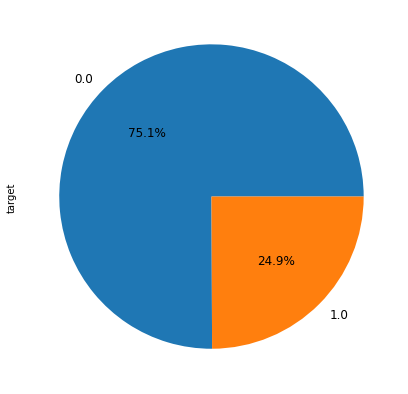

In [4]:
f, ax = plt.subplots(figsize=(7, 7))
train['target'].value_counts().plot.pie(ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

* 타겟 값의 불균형 보임 -> undersampling / oversampling 필요

In [5]:
print(train.info())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
print(test.info())
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB
None
enrollee_id                 

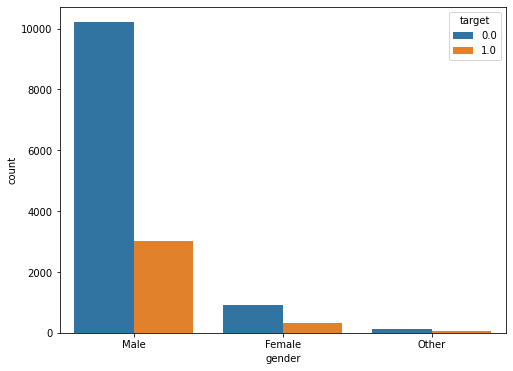

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender', hue = train['target'])

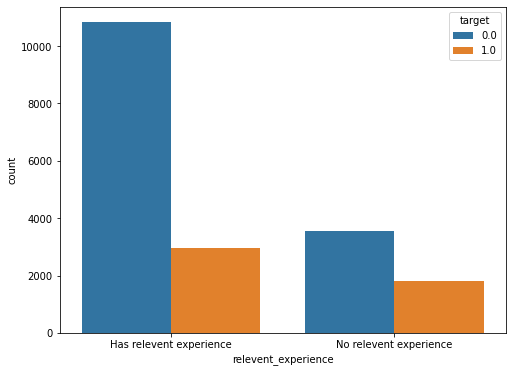

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'relevent_experience', hue = train['target'])

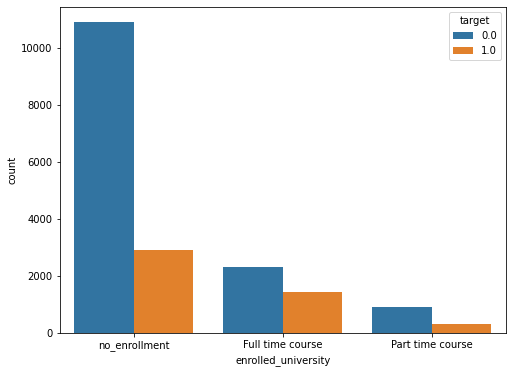

In [9]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'enrolled_university', hue = train['target'])

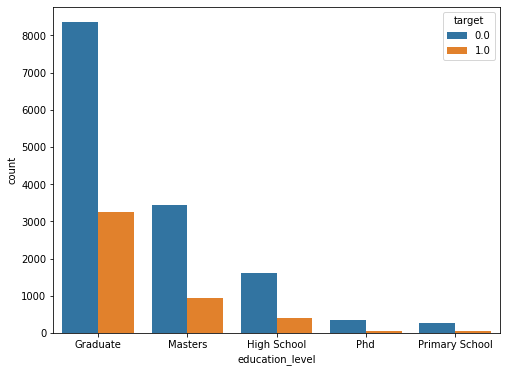

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'education_level', hue = train['target'])

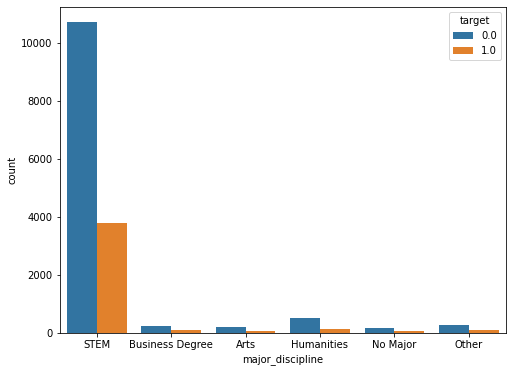

In [11]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'major_discipline', hue = train['target'])

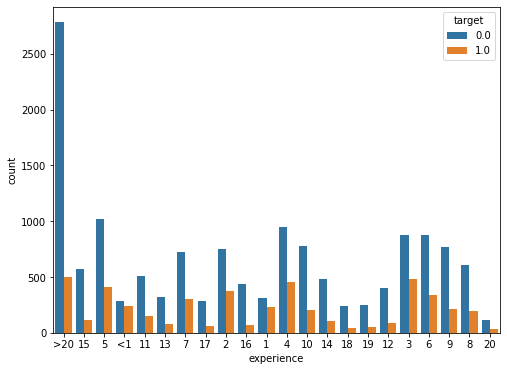

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'experience', hue = train['target'])

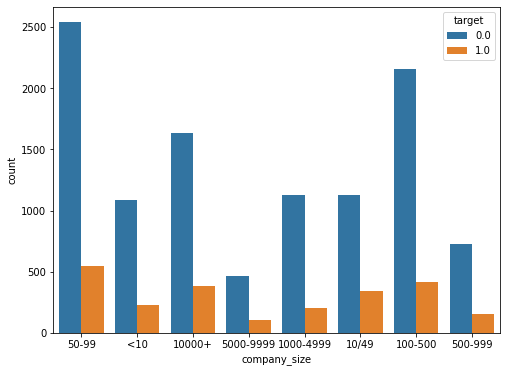

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'company_size', hue = train['target'])

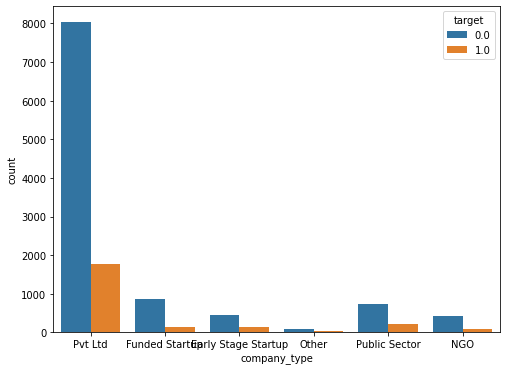

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'company_type', hue = train['target'])

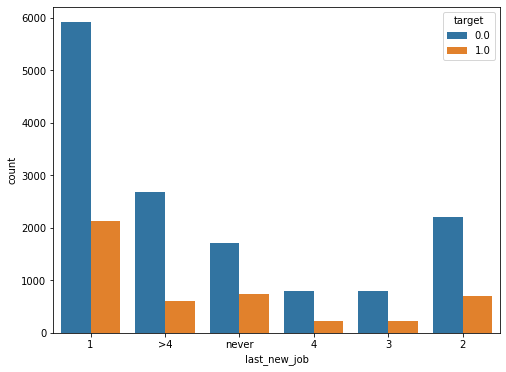

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'last_new_job', hue = train['target'])

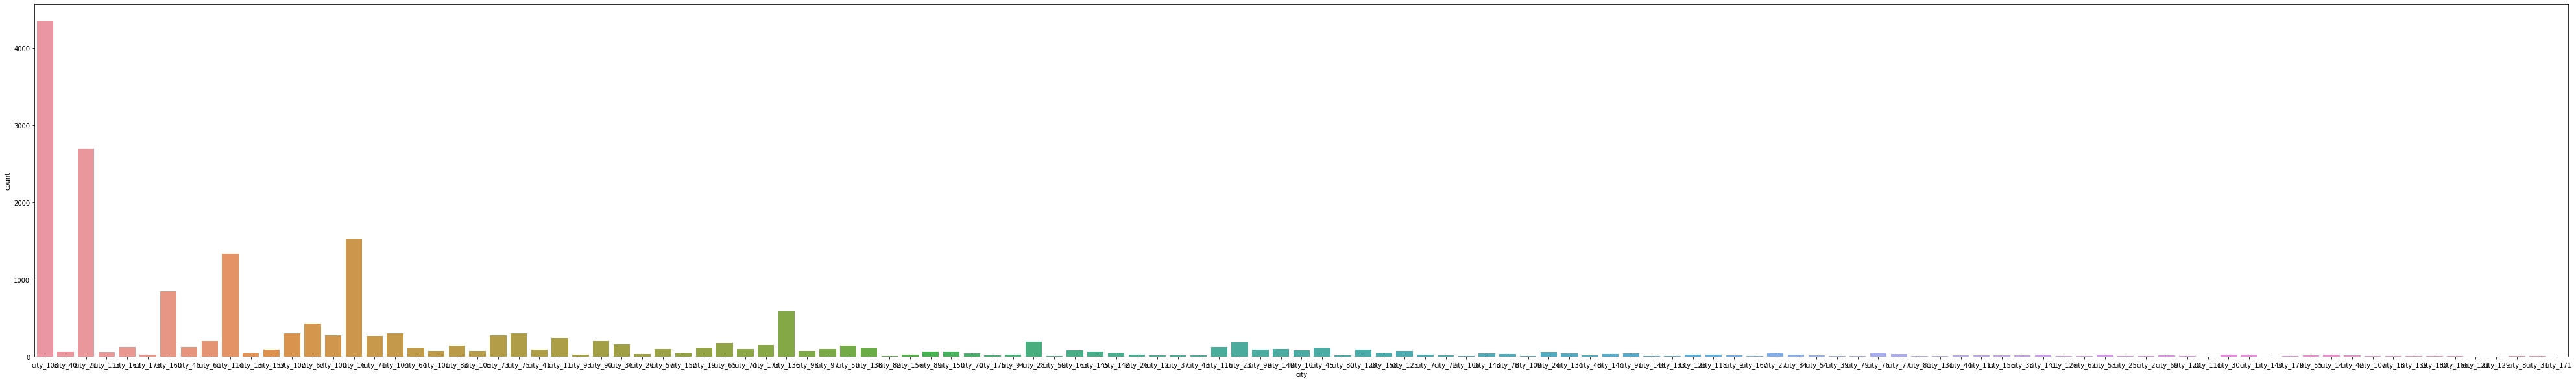

In [16]:
plt.figure(figsize = (70,10))
sns.countplot(data = train, x = 'city')

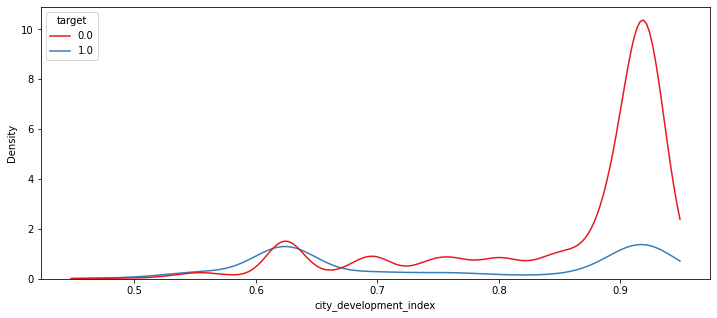

In [17]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data= train, x="city_development_index", hue="target",cut = 0,palette='Set1')

* developed cities에 사는 사람들이 직업을 바꿀 확률이 더 적다

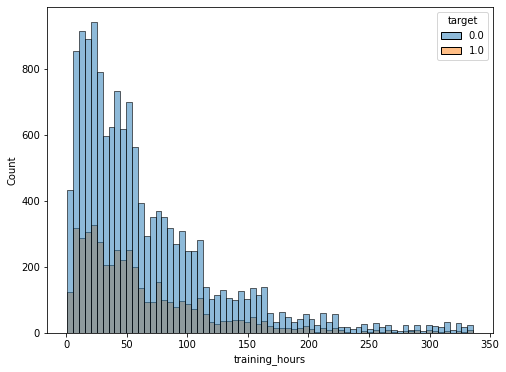

In [18]:
plt.figure(figsize = (8,6))
sns.histplot(data = train, x = 'training_hours', hue = train['target'])

## 전처리

### 범위를 숫자로

In [19]:
train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [20]:
def replace1(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0

    else:
        return experience

In [21]:
train.experience = train.experience.map(replace1)
train['experience'].unique()

array([21, '15', '5', 0, '11', '13', '7', '17', '2', '16', '1', '4', '10',
       '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [22]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [23]:
def replace2(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0

    else:
        return last_new_job

In [24]:
train.last_new_job = train.last_new_job.map(replace2)
train['last_new_job'].unique()

array(['1', 5, 0, '4', '3', '2', nan], dtype=object)

In [25]:
train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [26]:
def replace3(company_size):
    if company_size == '<10':
        return 9
    elif company_size == '10000+':
        return 10001
    elif company_size == '50-99':
        return 75
    elif company_size == '5000-9999':
        return 7500
    elif company_size == '10/49':
        return 25
    elif company_size == '1000-4999':
        return 25000
    elif company_size == '100-500':
        return 300
    elif company_size == '500-999':
        return 750

    else:
        return company_size

In [27]:
train.company_size = train.company_size.map(replace3)
train['company_size'].unique()

array([       nan, 7.5000e+01, 9.0000e+00, 1.0001e+04, 7.5000e+03,
       2.5000e+04, 2.5000e+01, 3.0000e+02, 7.5000e+02])

### 분석에 필요 없는 칼럼 삭제

In [28]:
train.drop(['enrollee_id', 'city'], axis = 1, inplace = True)

In [29]:
train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,75.0,Pvt Ltd,5,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,75.0,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,75.0,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,750.0,Pvt Ltd,2,97,0.0


### 결측 값 처리

In [30]:
train["gender"].fillna("Male", inplace = True)
train["enrolled_university"].fillna("no_enrollment", inplace = True)
train["education_level"].fillna("Graduate", inplace = True)
train["major_discipline"].fillna("STEM", inplace = True)
train["experience"].fillna("20", inplace = True)
train["company_size"].fillna(train["company_size"].mean(), inplace = True)
train["company_type"].fillna("Pvt Ltd", inplace = True)
train["last_new_job"].fillna("1", inplace = True)

In [31]:
train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,4487.393419,Pvt Ltd,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,75.000000,Pvt Ltd,5,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,4487.393419,Pvt Ltd,0,83,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,4487.393419,Pvt Ltd,0,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,75.000000,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,4487.393419,Pvt Ltd,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4487.393419,Pvt Ltd,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,75.000000,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,750.000000,Pvt Ltd,2,97,0.0


In [32]:
train.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### 정규화

In [33]:
from sklearn.preprocessing import MinMaxScaler
train["training_hours"] = MinMaxScaler().fit_transform(np.array(train["training_hours"]).reshape(-1,1))

In [34]:
train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,4487.393419,Pvt Ltd,1,0.104478,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,75.000000,Pvt Ltd,5,0.137313,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,4487.393419,Pvt Ltd,0,0.244776,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,4487.393419,Pvt Ltd,0,0.152239,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,75.000000,Funded Startup,4,0.020896,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,4487.393419,Pvt Ltd,1,0.122388,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4487.393419,Pvt Ltd,4,0.152239,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,75.000000,Pvt Ltd,4,0.128358,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,750.000000,Pvt Ltd,2,0.286567,0.0


### 인코딩

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [36]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('target')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  3
Number of Categorical features:  8


In [37]:
numerical_feats

['city_development_index', 'company_size', 'training_hours']

In [38]:
categorical_feats

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_type',
 'last_new_job']

In [39]:
train_one_hot = pd.get_dummies(train, columns = ['gender', 'relevent_experience', 'enrolled_university',
                                                 'education_level', 'major_discipline', 'experience', 'company_type', 'last_new_job'])
train.drop(['gender', 'relevent_experience', 'enrolled_university','education_level',
          'major_discipline', 'experience', 'company_type', 'last_new_job', 'target'],axis=1,inplace=True)
train = pd.concat([train ,train_one_hot],axis=1)

In [40]:
train.dtypes

city_development_index                         float64
company_size                                   float64
training_hours                                 float64
city_development_index                         float64
company_size                                   float64
training_hours                                 float64
target                                         float64
gender_Female                                    uint8
gender_Male                                      uint8
gender_Other                                     uint8
relevent_experience_Has relevent experience      uint8
relevent_experience_No relevent experience       uint8
enrolled_university_Full time course             uint8
enrolled_university_Part time course             uint8
enrolled_university_no_enrollment                uint8
education_level_Graduate                         uint8
education_level_High School                      uint8
education_level_Masters                          uint8
education_

### 불균형 처리

In [41]:
X = train.drop(['target'], axis=1)
y = train['target']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before Counter({0.0: 10081, 1.0: 3329})
After Counter({0.0: 10081, 1.0: 10081})


In [44]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)

ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0.0: 10081, 1.0: 3329})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Counter({1.0: 10083, 0.0: 10081})


## 모델링

In [45]:
X_train

,city_development_index,company_size,training_hours,city_development_index,company_size,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_0,experience_21,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_5,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4
8253,0.624,9.000000,0.116418,0.624,9.000000,0.116418,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
10067,0.920,300.000000,0.140299,0.920,300.000000,0.140299,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1851,0.624,4487.393419,0.400000,0.624,4487.393419,0.400000,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4139,0.682,4487.393419,0.131343,0.682,4487.393419,0.131343,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2473,0.624,4487.393419,0.200000,0.624,4487.393419,0.200000,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.920,4487.393419,0.071642,0.920,4487.393419,0.071642,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
11964,0.866,4487.393419,0.361194,0.866,4487.393419,0.361194,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5390,0.893,25.000000,0.167164,0.893,25.000000,0.167164,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
860,0.624,4487.393419,0.044776,0.624,4487.393419,0.044776,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [46]:
from keras.models import Sequential
from keras.layers import Dense
import keras

### 불균형 처리 전 모델링

In [47]:
model = keras.Sequential([keras.layers.Flatten(input_shape =(8,1)),
                keras.layers.Dense(128,activation = 'sigmoid'),    
                                        keras.layers.Dense(64,activation = 'sigmoid'),    
                          keras.layers.Dropout(0.4),
                keras.layers.Dense(32,activation = 'sigmoid'),    
                          keras.layers.Dropout(0.1),

                keras.layers.Dense(2,activation = 'sigmoid')])
model.compile(optimizer = 'sgd',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

### 불균형 처리 후 모델링